In [89]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib.colors as mcolors
import matplotlib.style as style
import matplotlib.cm as cm
import statsmodels.formula.api as smf

import matplotlib.pyplot as plt 
#from matplotlib.patches import Patch
import cartopy.crs as ccrs
import cartopy.io.img_tiles as cimgt
#from cartopy.feature import ShapelyFeature
#import geopandas as gpd
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
import matplotlib.cm as cm

import geopandas
import pyproj
import contextily as cx
import os
import folium

%matplotlib inline
plt.rcParams.update({
    'font.family': 'Arial',
    'font.sans-serif': ['Arial']})

In [90]:
#load and prep data for plotting

df_full = pd.read_csv("C:\\Users\\C837398661\\Desktop\\MDA8_O3_long_term_sites.csv", #load data
                 parse_dates=True,
                 index_col='Date')

df = df_full[(df_full.index.month >= 5) & (df_full.index.month <= 9)] #isolate May-September data

coords = pd.read_csv('C:\\Users\\C837398661\\Desktop\\MDA8_O3_long_term_sites_coords (1).csv')

In [208]:
df
#coords

,DENVER - CAMP,Welby,Aurora East,Chatfield State Park,HIGHLAND RESERVOIR,La Casa,NATIONAL RENEWABLE ENERGY LABS - NREL,ROCKY FLATS-N,Briggsdale,Greeley - Weld County Tower,Pawnee Buttes,FORT COLLINS - WEST,Fort Collins - CSU - S. Mason,Rocky Mountain NP - Long's Peak
Date,,,,,,,,,,,,,,
2005-05-01,NaN,37.0,NaN,35.0,36.0,NaN,36.0,41.0,NaN,NaN,NaN,NaN,NaN,NaN
2005-05-02,NaN,41.0,NaN,26.0,34.0,NaN,33.0,44.0,NaN,NaN,NaN,NaN,NaN,NaN
2005-05-03,NaN,47.0,NaN,51.0,53.0,NaN,44.0,50.0,NaN,NaN,NaN,NaN,NaN,NaN
2005-05-04,NaN,59.0,NaN,61.0,59.0,NaN,56.0,60.0,NaN,NaN,NaN,NaN,NaN,NaN
2005-05-05,NaN,51.0,NaN,60.0,59.0,NaN,58.0,57.0,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-09-26,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,66.0,58.0,56.0
2023-09-27,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,62.0,55.0,62.0
2023-09-28,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,61.0,53.0,58.0


In [38]:
x
x_ordinal = x.map(pd.Timestamp.toordinal)
(x_ordinal - x_ordinal.min())/(x_ordinal.max() - x_ordinal.min()) #normalizes x_ordinal numers starting at 0


Index([                   0.0,  0.0001486767766874814,  0.0002973535533749628,
       0.00044603033006244426,  0.0005947071067499256,  0.0007433838834374071,
        0.0008920606601248885,  0.0010407374368123698,  0.0011894142134998512,
        0.0013380909901873326,
       ...
           0.9986619090098127,     0.9988105857865002,     0.9989592625631877,
           0.9991079393398751,     0.9992566161165626,     0.9994052928932501,
           0.9995539696699376,      0.999702646446625,     0.9998513232233125,
                          1.0],
      dtype='float64', name='Date', length=8687)

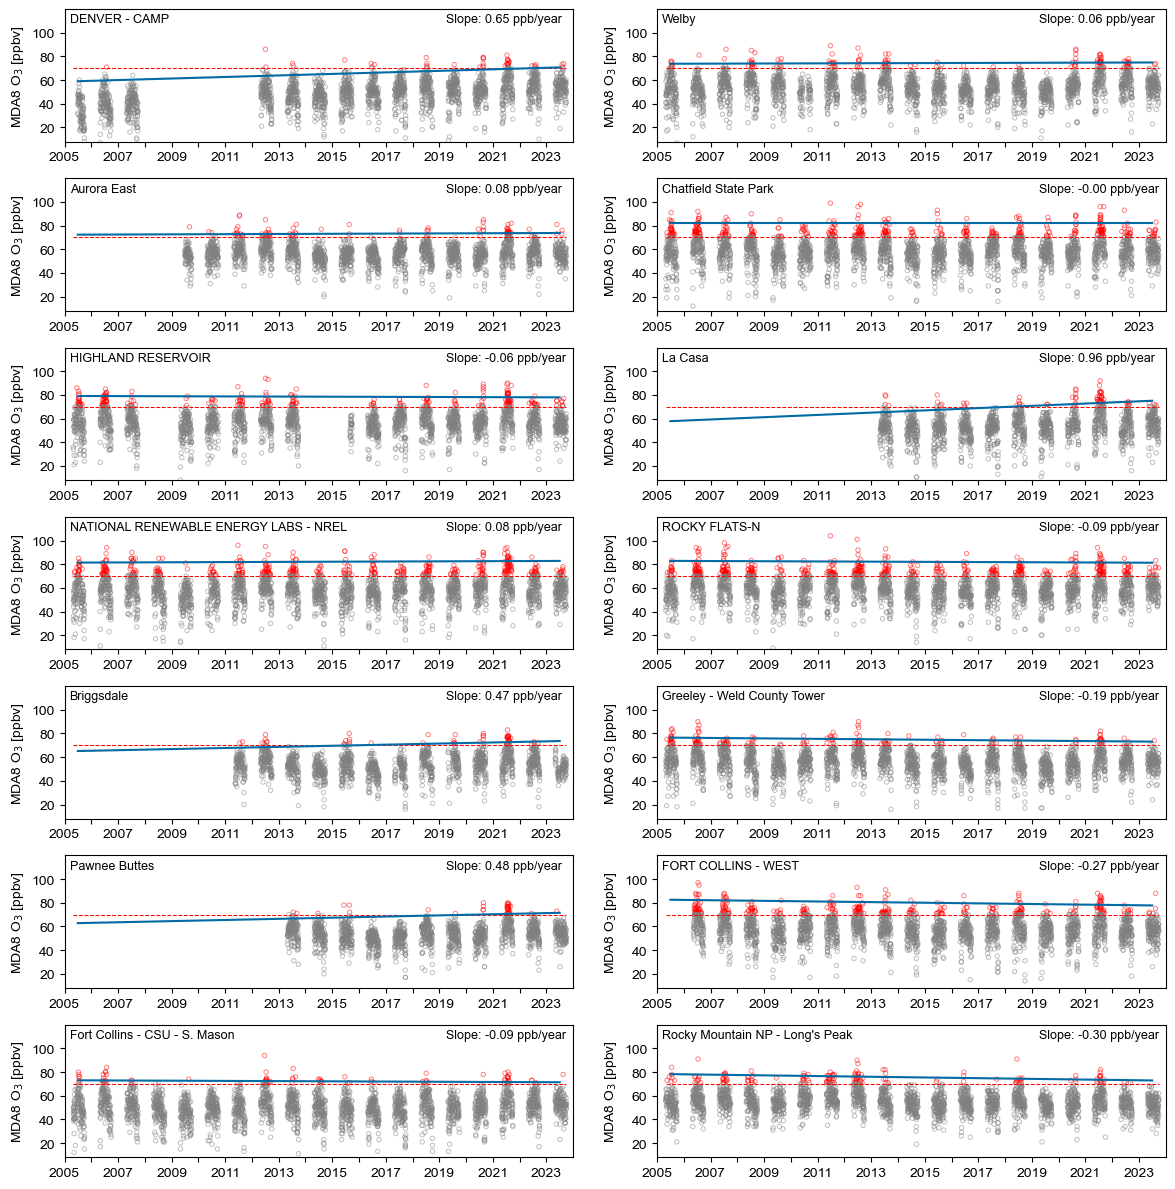

In [144]:
#plot data (long-term O3 trends)

quantile = 0.98

fig, axes = plt.subplots(int(len(df.columns)/2), 2, figsize = (12, 12)) #set up figure to have a separate column for each site (determined by len(df.columns))

ax = axes.flatten() #turn axes into a 1D array for easy looping
for i, site in enumerate(df.columns): #loop through all sites
        
    x = df.index #isolate datetime index
    y = df[site] #isolate data for the current site
        
    y_ex = y[y > 70] #isolate exceedance days (MDA8 > 70 ppb) and plot in red
    ax[i].scatter(x[y > 70], y_ex, label=site, alpha=.5, lw=0.7, s=10, marker='o', color='r', facecolor='none', zorder=0)
        
    y_below = y[y <= 70] #plot the rest of the days in gray
    ax[i].scatter(x[y <= 70], y_below , label=site, alpha=.5, lw=0.7, s=10, marker='o', color='gray', facecolor='none', zorder=0)

    x_ordinal = x.map(pd.Timestamp.toordinal) #creates a dataframe of x values that are increasing numbers
    x_ordinal = (x_ordinal - x_ordinal.min())/(x_ordinal.max() - x_ordinal.min()) #normalizes x_ordinal numers starting at 0
    data = pd.DataFrame({'y':y, 'x':x_ordinal}).dropna()

    model = smf.quantreg('y ~ x', data) #establish model
    result = model.fit(q=quantile)

    #plot a line, with x (array of years) and y values
    years = np.arange(len(x.year.unique())) #creates array (list) of individual years
    slope = result.params['x']/(len(x_ordinal)/365) #grabs slope and sets in in ppb per year not day
    #add std error later

    ax[i].plot(df.resample('YE').mean().index-pd.Timedelta(days=365/2),
       slope*years+result.params['Intercept']) #set up line using y = mx+b
    
    ax[i].annotate(f"Slope: {slope:.2f} ppb/year", xy=(0.75, 0.90), xycoords='axes fraction', fontsize=9) #what does slope represent again? Just general change?


for i in range(len(ax)):
    ax[i].set_ylim(8,120) #make y axis limits uniform
    ax[i].set_yticks([20, 40, 60, 80, 100]) #make y axis ticks uniform
    ax[i].set_xlim(pd.to_datetime('2005-01-01'), pd.to_datetime('2024-01-01')) #make x axis limit uniform
    ax[i].set_xticks(pd.date_range('2005-01-01', '2024-01-01', freq='YE')-pd.Timedelta(days=364)) #make x axis ticks uniform
    ax[i].hlines(70, xmin=df.index[0], xmax=df.index[-1], color='r', zorder=0, ls='--', lw=0.75) #add horizontal line at 70 ppb
    ax[i].annotate(df.columns[i], xy=(0.01, 0.90), xycoords='axes fraction', fontsize=9) #add site name to plots
    ax[i].set_ylabel('MDA8 O$_3$ [ppbv]') #add y axis label

    #clean up x axis ticks
    for j, tick in enumerate(ax[i].xaxis.get_major_ticks()):
        if j % 2 == 1 and i < len(ax[i].xaxis.get_major_ticks()) - 1:
            tick.label1.set_visible(False)
    ax[i].xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
    
fig.tight_layout() #automatically adjusts subplot spacing

#figure out how to truncate some of the lines 

#2021 pyrogenic smoke comes from fires that are far away 

In [33]:
result.params['x']

-7.0666006997983

In [69]:
df

,DENVER - CAMP,Welby,Aurora East,Chatfield State Park,HIGHLAND RESERVOIR,La Casa,NATIONAL RENEWABLE ENERGY LABS - NREL,ROCKY FLATS-N,Briggsdale,Greeley - Weld County Tower,Pawnee Buttes,FORT COLLINS - WEST,Fort Collins - CSU - S. Mason,Rocky Mountain NP - Long's Peak,dayofweek
Date,,,,,,,,,,,,,,,
2005-05-01,NaN,37.0,NaN,35.0,36.0,NaN,36.0,41.0,NaN,NaN,NaN,NaN,NaN,NaN,0
2005-05-02,NaN,41.0,NaN,26.0,34.0,NaN,33.0,44.0,NaN,NaN,NaN,NaN,NaN,NaN,1
2005-05-03,NaN,47.0,NaN,51.0,53.0,NaN,44.0,50.0,NaN,NaN,NaN,NaN,NaN,NaN,2
2005-05-04,NaN,59.0,NaN,61.0,59.0,NaN,56.0,60.0,NaN,NaN,NaN,NaN,NaN,NaN,3
2005-05-05,NaN,51.0,NaN,60.0,59.0,NaN,58.0,57.0,NaN,NaN,NaN,NaN,NaN,NaN,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-09-26,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,66.0,58.0,56.0,2
2023-09-27,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,62.0,55.0,62.0,3
2023-09-28,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,61.0,53.0,58.0,4


C:\Users\C837398661\AppData\Local\Temp\ipykernel_26856\167033433.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['dayofweek'] = df.index.dayofweek.map(custom_mapping)


IndexError: index 14 is out of bounds for axis 0 with size 14

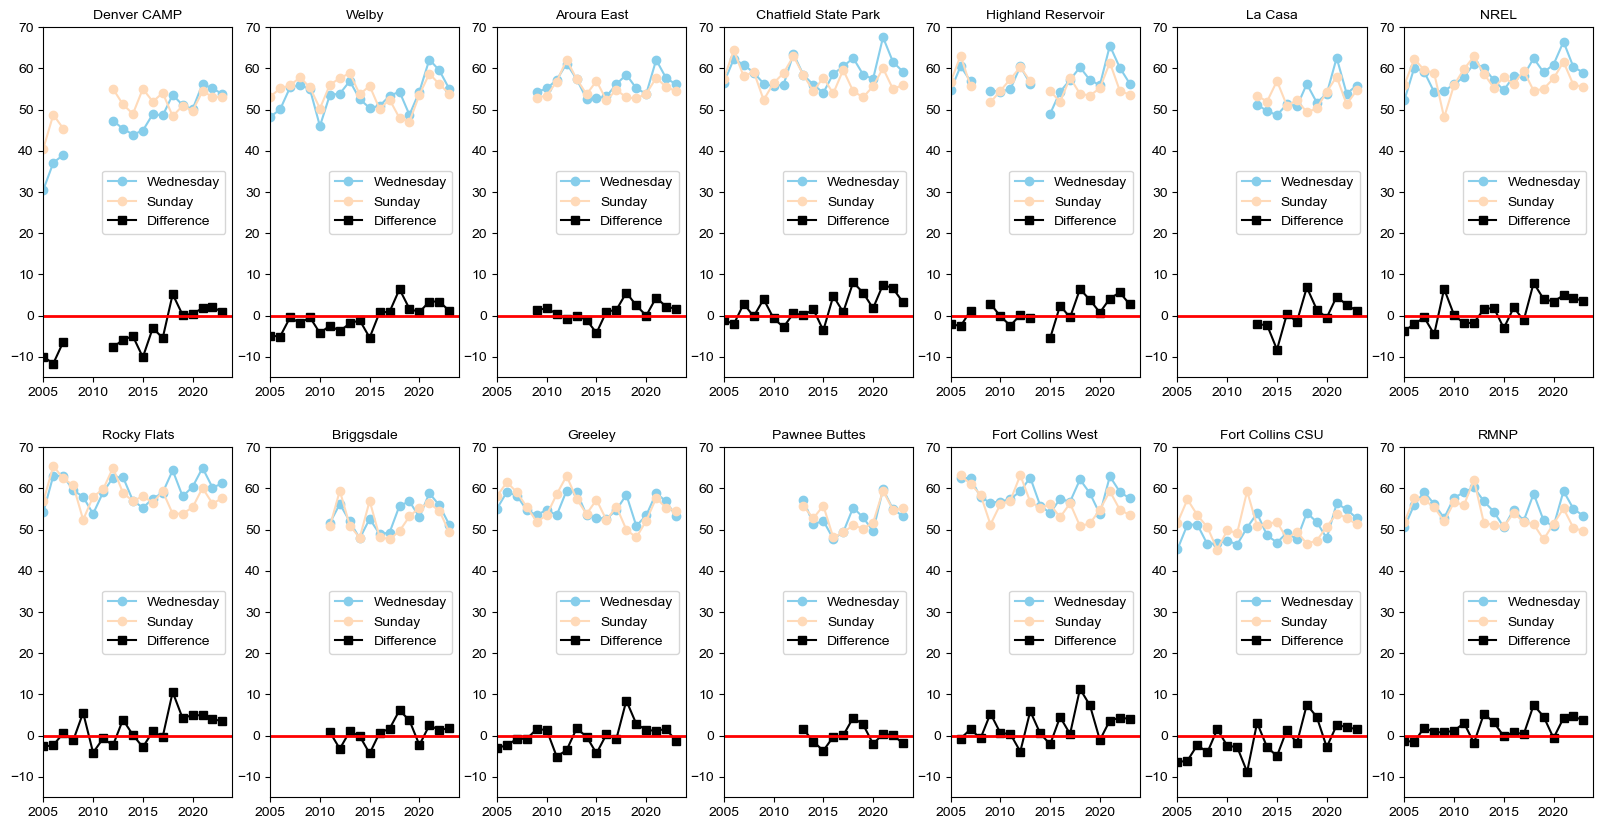

In [71]:
# group by the day of the week (0: Monday, 1: Tuesday, ..., 6: Sunday)
# May 1st 2005 was a Sunday
# make custom mapping for Sunday to be day 0, Monday to be day 1, and so on
custom_mapping = {6: 0, 0: 1, 1: 2, 2: 3, 3: 4, 4: 5, 5: 6}
df['dayofweek'] = df.index.dayofweek.map(custom_mapping)
df

#define function to remove NaN values from spreadsheets
def remove_nans(arr):
    return arr[~np.isnan(arr)]


fs = 10

#select wednesday and sundays to use for analysis
wednesday_data = df[df['dayofweek'] == 3]  # wed is 3 in the custom mapping
sunday_data = df[df['dayofweek'] == 0]     # sun is 0 in the custom mapping

#creates a space for the plots to live
fig, ax = plt.subplots(2, 7, figsize = (20,10))
#corrects numpy.array issue that has no plot
ax = ax.flatten()
titles = ('Denver CAMP', 'Welby', 'Aroura East', 'Chatfield State Park', 'Highland Reservoir', 'La Casa', 'NREL', 'Rocky Flats', 'Briggsdale', 'Greeley', 'Pawnee Buttes', 'Fort Collins West', 'Fort Collins CSU', 'RMNP')

averages_differences = []

for i, column in enumerate(df.columns):
    #arrayify 
    grouped = df.groupby('dayofweek')[column].apply(np.array) 
    grouped = grouped.apply(remove_nans)

    # Calculate averages for O3 and NO2 on Wednesdays and Sundays at each location
   # wednesday_averages = wednesday_data.groupby(column)[column].mean()
   # sunday_averages = sunday_data.groupby(column)[column].mean()
    wednesday_averages = wednesday_data[column].groupby(wednesday_data.index.year).mean()
    sunday_averages = sunday_data[column].groupby(sunday_data.index.year).mean()
    averages_difference = wednesday_averages - sunday_averages
    #print("Average Wednesday O3 and NO2")
    #print(wednesday_averages)
    #print("Average Sunday O3 and NO2")
    #print(sunday_averages)
    #I am only getting lenghts of ~60-200 for the averages, which is probably not enough for the number of weeks in this study, even with patchy data??
    ax[i].plot(wednesday_averages, marker = "o", color = 'skyblue', label = "Wednesday")
    ax[i].plot(sunday_averages, marker = "o", color = 'peachpuff', label = "Sunday")
    ax[i].plot(averages_difference, marker = "s", color = 'black', label = "Difference")
    ax[i].axhline(y=0,linewidth=2, color='r')
    ax[i].legend()
    ax[i].set_title(titles[i], fontsize = fs)
    ax[i].set_ylim(-15, 70)
    ax[i].set_xlim(2005, 2024)
   # ax[i].set_xlabel('Week Sampled', fontsize=7, color='k')
   # ax[i].set_ylabel('Average ppbv', fontsize=7, color='k')
    #tick labels
    averages_differences.append(averages_difference)
    
# make labels for x and y axes along the left side and bottom
#for i in range(2):
#    ax[i*6].set_ylabel('PPBV', fontsize=fs)
#for j in range(6):
#    ax[6+j].set_xlabel('Year', fontsize=fs)

#titles the page
fig.suptitle("Average Wednesday and Sunday O3 and NO2 Colorado Colocated Data 2005-2024")
#adds space between plots
fig.subplots_adjust(hspace=0.3)
plt.show()

#fig.autofmt_xdate()
 
#THIS IS A MEAUSURE OF OZONES'S SENSITIVITY


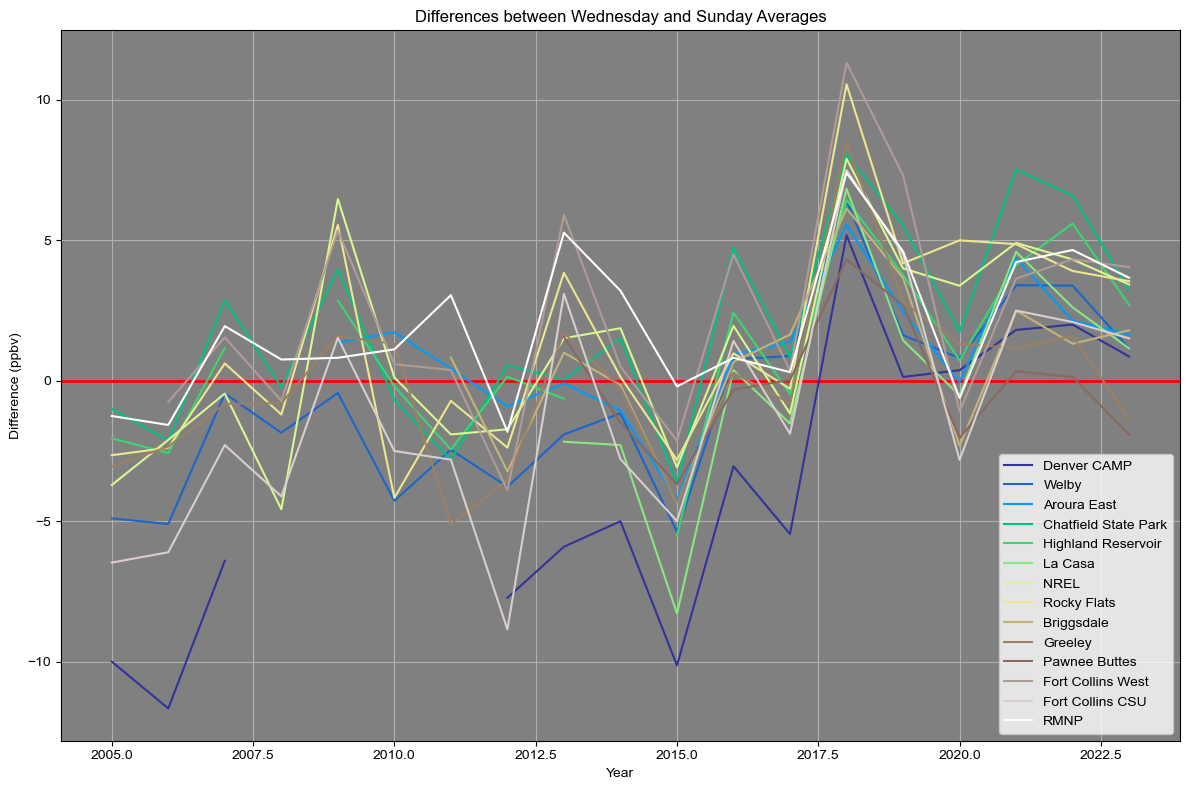

In [233]:
cmap = plt.get_cmap('terrain')
colors = cmap(np.linspace(0,1,14)) #get 10 colors along the full range of hsv colormap
#facecolor = darkgray
x = np.linspace(0,2*np.pi)
ys = np.ones((14,50)) * np.sin(x)
ys = np.array([ys[a,] * np.linspace(1,0.1,14)[a] for a in range(14)])

fig, ax = plt.subplots(figsize=(12,8))
ax.set_prop_cycle(color=colors) #set our 10 colors to the property cycle
ax.set_facecolor('gray') 
ax.axhline(y=0,linewidth=2, color='r')


titles = ['Denver CAMP', 'Welby', 'Aroura East', 'Chatfield State Park', 'Highland Reservoir', 'La Casa', 'NREL', 'Rocky Flats', 'Briggsdale', 'Greeley', 'Pawnee Buttes', 'Fort Collins West', 'Fort Collins CSU', 'RMNP']
#colors = ['red', 'blue', 'red', 'blue', 'red', 'blue', 'red', 'blue','red', 'blue','red', 'blue','red', 'blue']

#plt.figure(figsize=(12,8))

for i, title in enumerate(titles):
    plt.plot(averages_differences[i], label=title, color=colors[i])
    plt.legend()

#fig.patch.set_facecolor('pink') 

plt.title('Differences between Wednesday and Sunday Averages')
plt.xlabel('Year')
plt.ylabel('Difference (ppbv)')
plt.legend()
plt.grid(True)
plt.tight_layout()
#plt.show() 

#think about what this means - all the spikes happen in the same place...
#spike years happen when there is significantly more weekday travel than weekend - and apparently the trend applies to all/most locations in a given year. 
# What about people causes this to happen? 

In [234]:
#all the boxplots (2005-2024, 2017-2024)
# A POSOTOVE TREND IN DIFFERNECS; IS THERE A POSITIVE TREN IN PRECURSORS?
#give VOCS a go; find trends and DOW dependance?
#analyze by tracer compund or group them into VOC families: alkanes, alkenes, aromatics
#fix the map

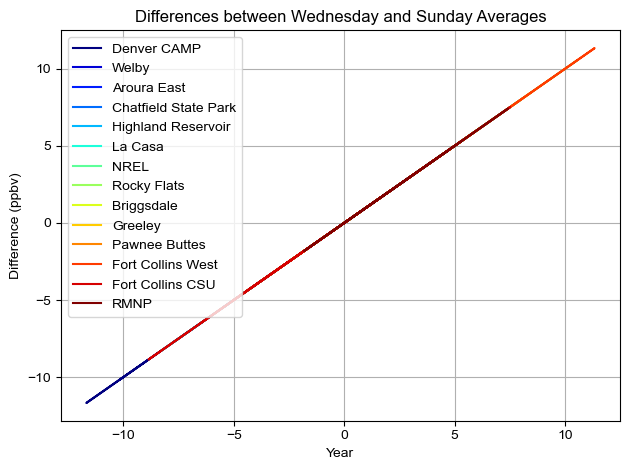

In [162]:
cmap = plt.get_cmap('jet')
colors = cmap(np.linspace(0,1,14)) #get 10 colors along the full range of hsv colormap
#x = np.linspace(0,2*np.pi)
#ys = np.ones((14,50)) * np.sin(x)
#ys = np.array([ys[a,] * np.linspace(1,0.1,14)[a] for a in range(14)])

fig, ax = plt.subplots()
#ax.set_prop_cycle(color=colors) #set our 10 colors to the property cycle

titles = ['Denver CAMP', 'Welby', 'Aroura East', 'Chatfield State Park', 'Highland Reservoir', 'La Casa', 'NREL', 'Rocky Flats', 'Briggsdale', 'Greeley', 'Pawnee Buttes', 'Fort Collins West', 'Fort Collins CSU', 'RMNP']
#colors = ['red', 'blue', 'red', 'blue', 'red', 'blue', 'red', 'blue','red', 'blue','red', 'blue','red', 'blue']

#plt.figure(figsize=(12,8))

for i, title in enumerate(titles):
    plt.plot(averages_differences[i], averages_differences[i], label=title, color=colors[i])

#plt.legend()

plt.title('Differences between Wednesday and Sunday Averages')
plt.xlabel('Year')
plt.ylabel('Difference (ppbv)')
plt.legend()
plt.grid(True)
plt.tight_layout()
#plt.facecolor(grey)
#plt.show() 

#plt.xlim(pd.to_datetime('2005-01-01'), pd.to_datetime('2024-01-01')) #make x axis limit uniform
#plt.xticks(pd.date_range('2005-01-01', '2024-01-01', freq='YE')-pd.Timedelta(days=364)) #make x axis ticks uniform

#think about what this means - all the spikes happen in the same place...

#plt.plot(x, ys.T)

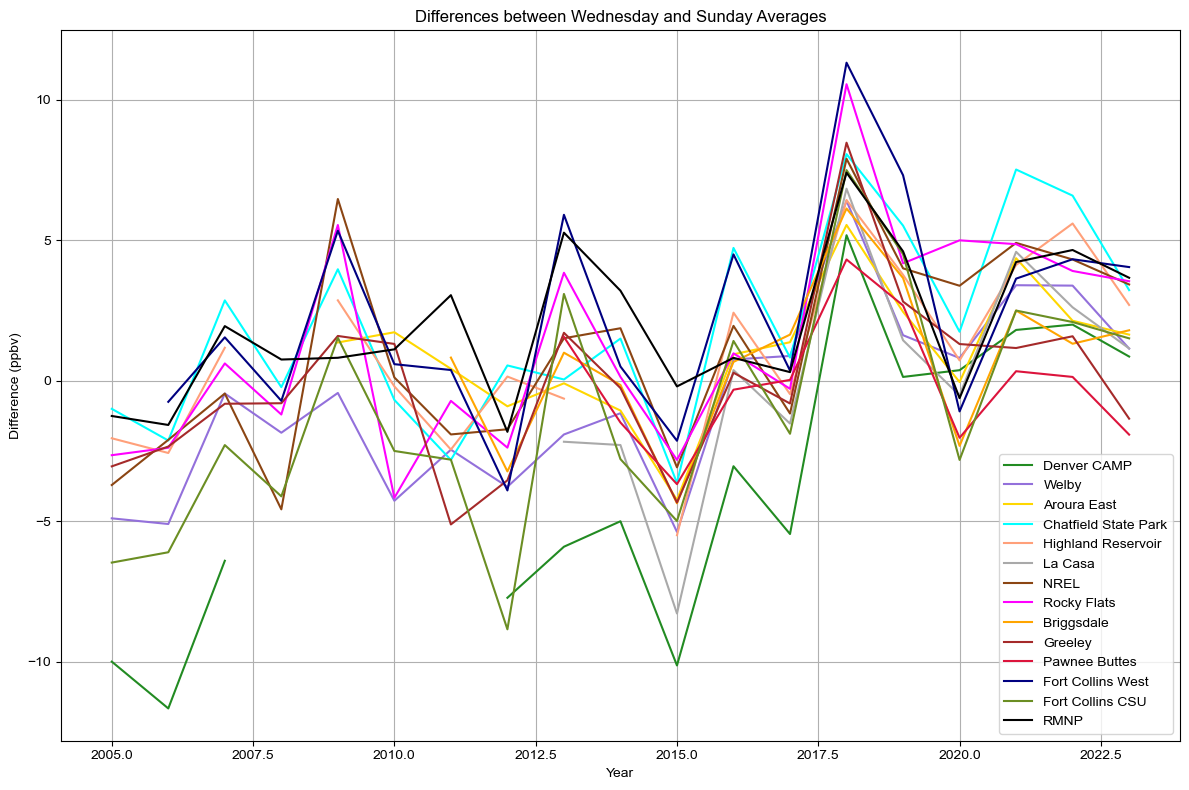

In [130]:
titles = ['Denver CAMP', 'Welby', 'Aroura East', 'Chatfield State Park', 'Highland Reservoir', 'La Casa', 'NREL', 'Rocky Flats', 'Briggsdale', 'Greeley', 'Pawnee Buttes', 'Fort Collins West', 'Fort Collins CSU', 'RMNP']
colors = ['forestgreen', 'mediumpurple', 'gold', 'cyan', 'lightsalmon', 'darkgrey', 'saddlebrown', 'magenta', 'orange', 'brown', 'crimson', 'navy', 'olivedrab', 'black']

plt.figure(figsize=(12,8))

for i, title in enumerate(titles):
    plt.plot(averages_differences[i], label=title, color=colors[i])

plt.title('Differences between Wednesday and Sunday Averages')
plt.xlabel('Year')
plt.ylabel('Difference (ppbv)')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show() 

#think about what this means - all the spikes happen in the same place...

In [94]:
averages_differences[0]

Date
2005   -10.000000
2006   -11.666667
2007    -6.409091
2008          NaN
2009          NaN
2010          NaN
2011          NaN
2012    -7.727273
2013    -5.909091
2014    -5.002165
2015   -10.136364
2016    -3.043290
2017    -5.456710
2018     5.181818
2019     0.136364
2020     0.376623
2021     1.809524
2022     2.000000
2023     0.862155
Name: DENVER - CAMP, dtype: float64

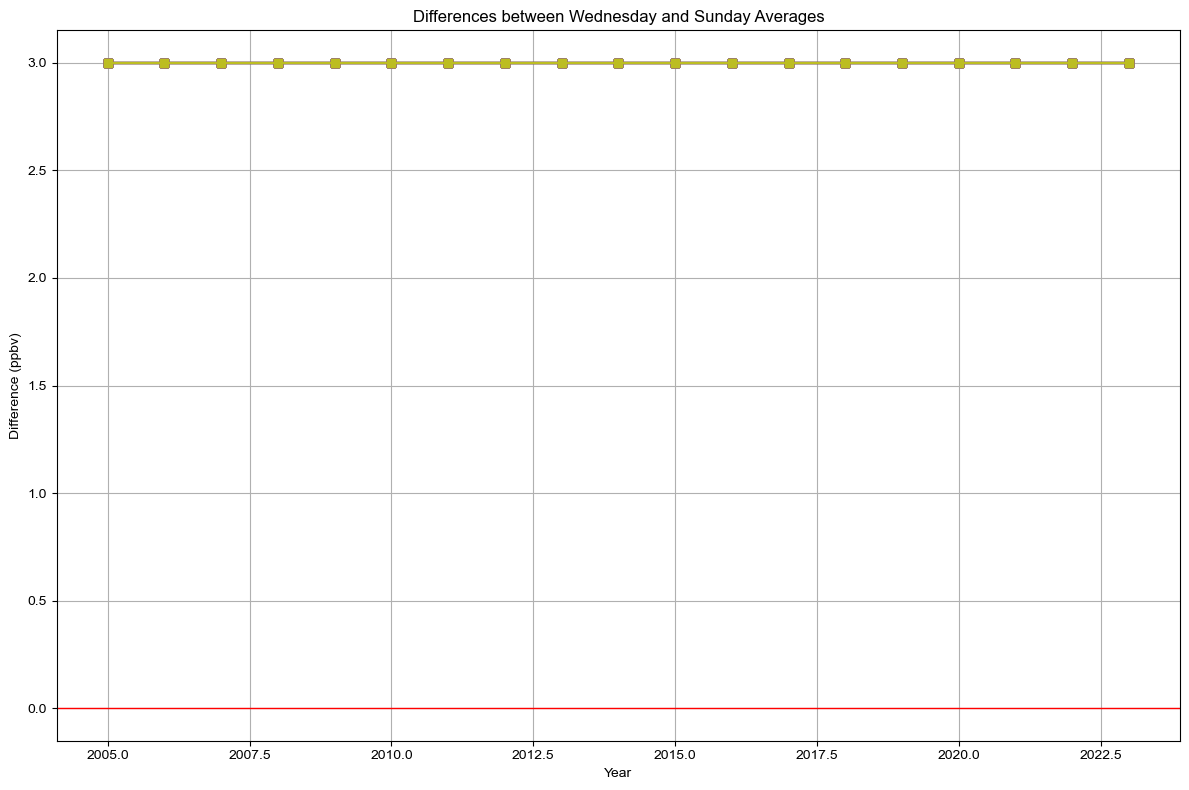

In [79]:
#plot all the differences together

#creates a space for the plots to live
plt.figure(figsize=(12,8))
#corrects numpy.array issue that has no plot
#ax = ax.flatten()
titles = ['Denver CAMP', 'Welby', 'Aroura East', 'Chatfield State Park', 'Highland Reservoir', 'La Casa', 'NREL', 'Rocky Flats', 'Briggsdale', 'Greeley', 'Pawnee Buttes', 'Fort Collins West', 'Fort Collins CSU', 'RMNP']

for i in averages_differences:

    #averages_difference[column].plot(marker='s', label=titles)
    plt.plot(averages_difference, marker='s', label=titles)

plt.axhline(y=0, color='r', linestyle='-', linewidth=1)  # Add horizontal line at y=0

plt.title('Differences between Wednesday and Sunday Averages')
plt.xlabel('Year')
plt.ylabel('Difference (ppbv)')
#plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show() 

#!!!!!!!!!!!!!!!!!!



In [68]:
averages_difference

Date
2005    3.0
2006    3.0
2007    3.0
2008    3.0
2009    3.0
2010    3.0
2011    3.0
2012    3.0
2013    3.0
2014    3.0
2015    3.0
2016    3.0
2017    3.0
2018    3.0
2019    3.0
2020    3.0
2021    3.0
2022    3.0
2023    3.0
Name: dayofweek, dtype: float64

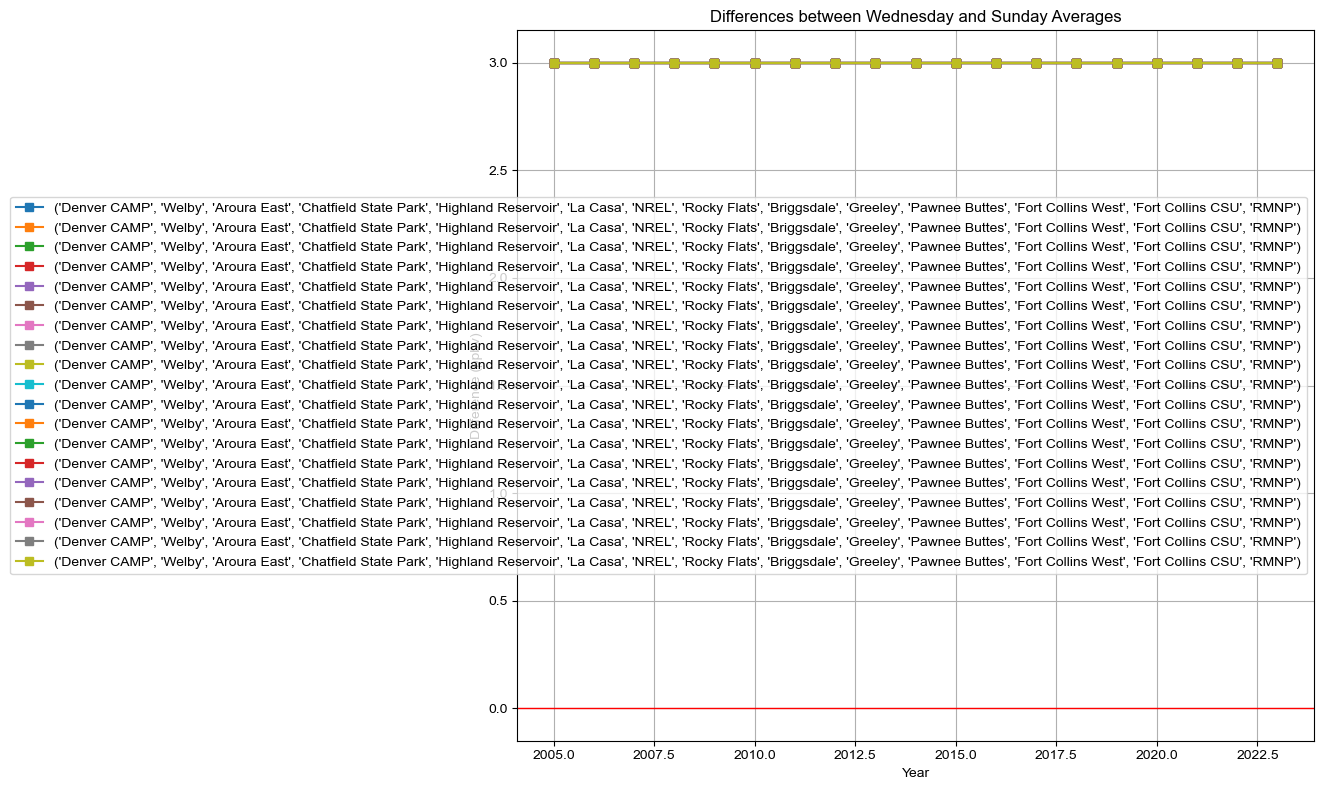

In [98]:
#plot all the differences together

#creates a space for the plots to live
plt.figure(figsize=(12,8))
#corrects numpy.array issue that has no plot
#ax = ax.flatten()
titles = ('Denver CAMP', 'Welby', 'Aroura East', 'Chatfield State Park', 'Highland Reservoir', 'La Casa', 'NREL', 'Rocky Flats', 'Briggsdale', 'Greeley', 'Pawnee Buttes', 'Fort Collins West', 'Fort Collins CSU', 'RMNP')

for column in averages_difference:

    #averages_difference[column].plot(marker='s', label=titles)
    plt.plot(averages_difference, marker='s', label=titles)

plt.axhline(y=0, color='r', linestyle='-', linewidth=1)  # Add horizontal line at y=0

plt.title('Differences between Wednesday and Sunday Averages')
plt.xlabel('Year')
plt.ylabel('Difference (ppbv)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show() 

#!!!!!!!!!!!!!!!!!!

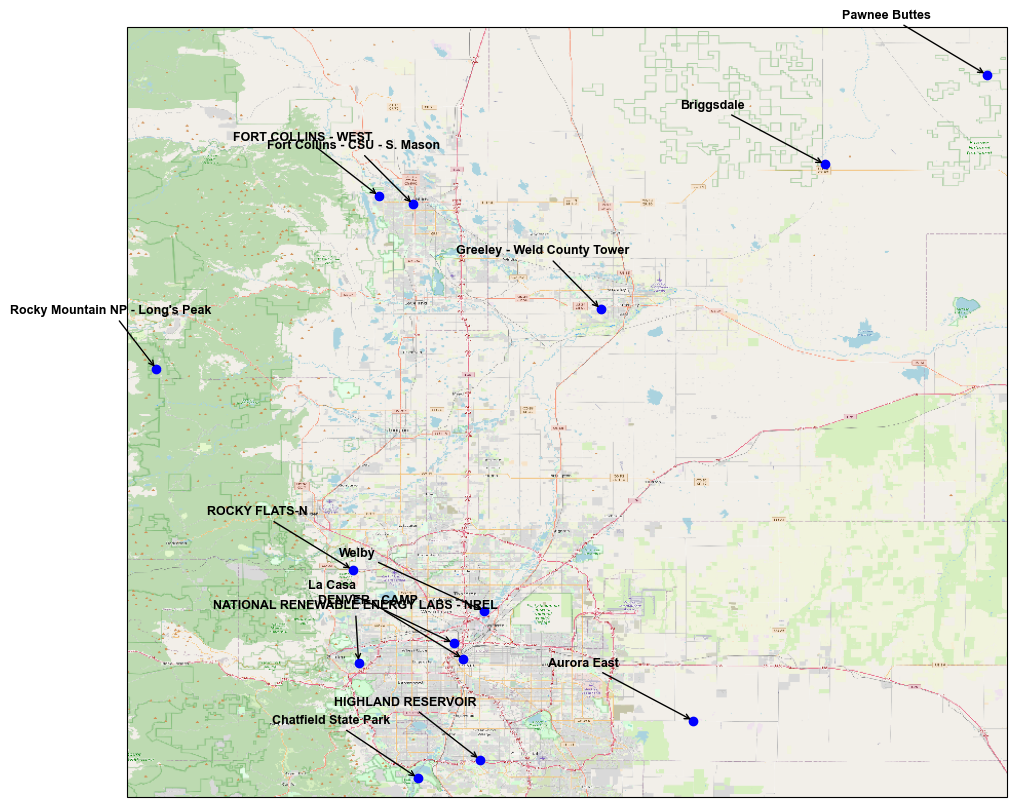

In [ ]:
#map the locations

minlon, maxlon, minlat, maxlat = (-105.6, -104.0, 39.5, 40.9) #specify extent of map

proj = ccrs.PlateCarree()
fig = plt.figure(figsize=(15, 10))

main_ax = fig.add_subplot(1, 1, 1, projection=proj)
main_ax.set_extent([minlon, maxlon, minlat, maxlat], crs=proj)

#o3_columns = df_2021.columns[df_2021.columns.str.endswith('_o3')]
#wd_columns = o3_columns.str.replace('_o3', '_wd')

#main_ax.scatter(coords.iloc[:,2], coords.iloc[:,1], color='b')
main_ax.scatter(coords['Site Longitude'], coords['Site Latitude'], color='b', transform=ccrs.PlateCarree())

#for i in range(len(coords)):
 #   t = main_ax.text(coords.iloc[:,2][i]+0.01, coords.iloc[:,1][i]+0.01, coords.iloc[:,0][i],  transform=ccrs.PlateCarree(), fontsize=9, fontweight='bold', c='k', zorder=2)
    #acecolor='white', alpha=0.8, edgecolor='white', boxstyle='square,pad=.01'))
for i, place in enumerate(coords['Local Site Name']):
    main_ax.annotate(place, xy=(coords['Site Longitude'][i], coords['Site Latitude'][i]),
                     xytext=(coords['Site Longitude'][i] + 0.1, coords['Site Latitude'][i] + 0.1),
                     textcoords='offset points', fontsize=9, fontweight='bold', c='k',
                     arrowprops=dict(facecolor='black', arrowstyle='->', zorder = 2))

request = cimgt.OSM()
#grabs map
main_ax.add_image(request, 11)
#zoom level

In [239]:
coords

,Local Site Name,Site Latitude,Site Longitude
0,Welby,39.838119,-104.949840
1,HIGHLAND RESERVOIR,39.567887,-104.957193
2,Aurora East,39.638522,-104.569335
3,DENVER - CAMP,39.751184,-104.987625
4,La Casa,39.779490,-105.005180
5,Chatfield State Park,39.534488,-105.070358
6,ROCKY FLATS-N,39.912799,-105.188587
7,NATIONAL RENEWABLE ENERGY LABS - NREL,39.743724,-105.177989
8,Greeley - Weld County Tower,40.386368,-104.737440
9,Briggsdale,40.650000,-104.330000


In [238]:
# Mapping ASOS Weather Stations Across New York City and Annotating Them
# This code uses a spoofing algorithm to avoid bounceback from OSM servers
# -- This code also parses lat/lon information from the ASOS station .txt
# -- file located here: ftp://ftp.ncdc.noaa.gov/pub/data/ASOS_Station_Photos/asos-stations.txt
#
import csv
import numpy as np
import cartopy.crs as ccrs
import matplotlib.pyplot as plt
import cartopy.io.img_tiles as cimgt
from cartopy.mpl.ticker import LongitudeFormatter, LatitudeFormatter
import io
from urllib.request import urlopen, Request
from PIL import Image

def image_spoof(self, tile): # this function pretends not to be a Python script
    url = self._image_url(tile) # get the url of the street map API
    req = Request(url) # start request
    req.add_header('User-agent','Anaconda 3') # add user agent to request
    fh = urlopen(req) 
    im_data = io.BytesIO(fh.read()) # get image
    fh.close() # close url
    img = Image.open(im_data) # open image with PIL
    img = img.convert(self.desired_tile_form) # set image format
    return img, self.tileextent(tile), 'lower' # reformat for cartopy

################################
# parsing the ASOS coordinates
################################
#
#asos_data = []
#with open('asos-stations.txt','r') as dat_file:
#    reader = csv.reader(dat_file)
#    for row in reader:
#        asos_data.append(row)

row_delin = asos_data[3][0].split(' ')[:-1]
col_sizes = [len(ii) for ii in row_delin]

col_header = []; iter_ii = 0
for ii,jj in enumerate(col_sizes):
    col_header.append(asos_data[2][0][iter_ii:iter_ii+col_sizes[ii]].replace(' ',''))
    iter_ii+=col_sizes[ii]+1
    
call,names,lats,lons,elevs = [],[],[],[],[]
for row in asos_data[4:]:
    data = []; iter_cc = 0
    for cc in range(0,len(col_header)):
        data.append(row[0][iter_cc:iter_cc+col_sizes[cc]].replace('  ',''))
        iter_cc+=col_sizes[cc]+1
    call.append(data[3])
    names.append(data[4])
    lats.append(float(data[9]))
    lons.append(float(data[10]))
    elevs.append(float(data[11]))

#######################################
# Formatting the Cartopy plot
#######################################
#
cimgt.Stamen.get_image = image_spoof # reformat web request for street map spoofing
osm_img = cimgt.Stamen('terrain') # spoofed, downloaded street map

fig = plt.figure(figsize=(12,9)) # open matplotlib figure
ax1 = plt.axes(projection=osm_img.crs) # project using coordinate reference system (CRS) of street map
ax1.set_title('ASOS Station Map',fontsize=16)
# extent = [-124.7844079,-66.9513812, 24.7433195, 49.3457868] # Contiguous US bounds
extent = [-74.257159,-73.699215,40.495992,40.915568] # NYC bounds
ax1.set_extent(extent) # set extents
ax1.set_xticks(np.linspace(extent[0],extent[1],7),crs=ccrs.PlateCarree()) # set longitude indicators
ax1.set_yticks(np.linspace(extent[2],extent[3],7)[1:],crs=ccrs.PlateCarree()) # set latitude indicators
lon_formatter = LongitudeFormatter(number_format='0.1f',degree_symbol='',dateline_direction_label=True) # format lons
lat_formatter = LatitudeFormatter(number_format='0.1f',degree_symbol='') # format lats
ax1.xaxis.set_major_formatter(lon_formatter) # set lons
ax1.yaxis.set_major_formatter(lat_formatter) # set lats
ax1.xaxis.set_tick_params(labelsize=14)
ax1.yaxis.set_tick_params(labelsize=14)

scale = np.ceil(-np.sqrt(2)*np.log(np.divide((extent[1]-extent[0])/2.0,350.0))) # empirical solve for scale based on zoom
scale = (scale<20) and scale or 19 # scale cannot be larger than 19
ax1.add_image(osm_img, int(scale)) # add OSM with zoom specification

#######################################
# Plot the ASOS stations as points
#######################################
#
ax1.plot(lons, lats, markersize=10,marker='o',linestyle='',color='#b30909',transform=ccrs.PlateCarree(),label='ASOS Station')
transform = ccrs.PlateCarree()._as_mpl_transform(ax1) # set transform for annotations
# text annotations
for lat_s,lon_s,name_s in zip(lats,lons,names): # loop through lats/lons/names
    if lon_s>extent[0] and lon_s<extent[1] and lat_s>extent[2] and lat_s<extent[3]:
        print(name_s)
        # annotations, with some random placement to avoid overlap
        ax1.text(lon_s, lat_s+(np.random.randn(1)*0.01),name_s, {'color': 'k', 'fontsize': 8},
                 horizontalalignment='center', verticalalignment='bottom',
                 clip_on=False,transform=transform,bbox=dict(boxstyle="round",
                   ec='#121212', fc='#fadede'))

ax1.legend() # add a legend 
plt.show() # show plot

IndexError: list index out of range

In [3]:
# Mapping New York City Open Street Map (OSM) with Cartopy
# This code uses a spoofing algorithm to avoid bounceback from OSM servers
#
import matplotlib.pyplot as plt 
import numpy as np
import cartopy.crs as ccrs
import cartopy.io.img_tiles as cimgt
import io
from urllib.request import urlopen, Request
from PIL import Image


#extent =
minlon, maxlon, minlat, maxlat = (-105.6, -104.0, 39.5, 40.9) #specify extent of map
#[minlon, maxlon, minlat, maxlat]

def image_spoof(self, tile): # this function pretends not to be a Python script
    url = self._image_url(tile) # get the url of the street map API
    req = Request(url) # start request
    req.add_header('User-agent','Anaconda 3') # add user agent to request
    fh = urlopen(req) 
    im_data = io.BytesIO(fh.read()) # get image
    fh.close() # close url
    img = Image.open(im_data) # open image with PIL
    img = img.convert(self.desired_tile_form) # set image format
    return img, self.tileextent(tile), 'lower' # reformat for cartopy

cimgt.OSM.get_image = image_spoof # reformat web request for street map spoofing
osm_img = cimgt.OSM() # spoofed, downloaded street map

fig = plt.figure(figsize=(12,9)) # open matplotlib figure
ax1 = plt.axes(projection=osm_img.crs) # project using coordinate reference system (CRS) of street map
center_pt = [40.577470,-105.078920] # lat/long of CSU
zoom = 0.00075 # for zooming out of center point
extent = [center_pt[1]-(zoom*4.0),center_pt[1]+(zoom*4.0),center_pt[0]-zoom,center_pt[0]+zoom] # adjust to zoom
ax1.set_extent([minlon, maxlon, minlat, maxlat]) # set extents

scale = np.ceil(-np.sqrt(2)*np.log(np.divide(zoom,350.0))) # empirical solve for scale based on zoom
scale = (scale<20) and scale or 19 # scale cannot be larger than 19
ax1.add_image(osm_img, int(scale)) # add OSM with zoom specification
# NOTE: zoom specifications should be selected based on extent:
# -- 2     = coarse image, select for worldwide or continental scales
# -- 4-6   = medium coarseness, select for countries and larger states
# -- 6-10  = medium fineness, select for smaller states, regions, and cities
# -- 10-12 = fine image, select for city boundaries and zip codes
# -- 14+   = extremely fine image, select for roads, blocks, buildings
plt.show() # show the plot

In [6]:
coords

,Local Site Name,Site Latitude,Site Longitude
0,Welby,39.838119,-104.949840
1,HIGHLAND RESERVOIR,39.567887,-104.957193
2,Aurora East,39.638522,-104.569335
3,DENVER - CAMP,39.751184,-104.987625
4,La Casa,39.779490,-105.005180
5,Chatfield State Park,39.534488,-105.070358
6,ROCKY FLATS-N,39.912799,-105.188587
7,NATIONAL RENEWABLE ENERGY LABS - NREL,39.743724,-105.177989
8,Greeley - Weld County Tower,40.386368,-104.737440
9,Briggsdale,40.650000,-104.330000


In [96]:
#try to make a new map with folium package

minlon, maxlon, minlat, maxlat = (-105.6, -104.0, 39.5, 40.9) #specify extent of map
southwest = (36.993076, -109.045223)  # (lat, lon)
northeast = (41.003444, -102.041524)  # (lat, lon)
zoom = 19
#the zoom is doing something very wierd but will deal with later

#O3trendscolors = b

my_map1 = folium.Map(location = [40.577470, -105.078920], zoom_start = zoom, titles = "CartoDB Positron", zoom_control=False, dragging=False, scrollWheelZoom=False)
#try titles = OpenStreetMap, Mapbox, or CartoDB Positron
#these maps are interactive if you make the ending parameters True
my_map1.fit_bounds([southwest, northeast])

for i, column in coords.iterrows():
    #folium.Marker([column['Site Latitude'], column['Site Longitude']], popup=column['Local Site Name'], icon = folium.Icon(color = 'black', icon = 'circle')).add_to(my_map1)
    #folium.CircleMarker([column['Site Latitude'], column['Site Longitude']], radius = 2, color = 'black', fill=True, fill_color='blue', popup=folium.Popup(column['Local Site Name'], max_width=300)).add_to(my_map1)
    folium.CircleMarker([column['Site Latitude'], column['Site Longitude']], radius = 4, weight = 0.5, color = 'black', opacity = 1, fill=True, fill_color='blue', fill_opacity = 1).add_child(folium.Popup('My name is Circle')).add_to(my_map1)
#try cloud, star, info-sign markers, etc. 
# folium.CircleMarker() is also a thing
#adding popup markers are an interactive element where if you click on the marker a text box with various info appears
    # Add text next to the marker
    # Customize the label style (text size, font, location); use an f-string?
    label_html = f"""<div style="font-family: Arial, sans-serif; color: black; font-size: 12px; font-weight: bold; text-align: center; margin-top: -10px;  /* Adjust vertical position */
                margin-left: 10px; /* Adjust horizontal position */ padding: 5px; border-radius: 10px; white-space: nowrap;"> {column['Local Site Name']}</div>"""
    #background-color: white; 
    # Add the label next to the marker
    folium.Marker(location=[column['Site Latitude'], column['Site Longitude']], icon=folium.DivIcon(html=label_html), tooltip=column['Local Site Name'],  # Optional tooltip for additional information
    ).add_to(my_map1)

# save method of Map object will create a map
my_map1.save("my_map1.html" )

#use folium.CustomPane() to add another layer with labels - nevermind
#you can also add and outline polygons using folium; might be helpful for highlighing regions of different activity

my_map1

# help with plotting many diffent types of points (for later on): https://geopandas.org/en/stable/gallery/plotting_with_folium.html
